# Project #2

#### By: Eric Zhang

In [63]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import bernoulli
import sklearn
from mpl_toolkits.mplot3d import Axes3D
import numpy as np  # Import NumPy for meshgrid

from pandas_datareader import wb
from datetime import datetime
from pandas import Series, DataFrame

%matplotlib inline
sns.set_style('whitegrid')

# Importing Stock market data from the Internet

from pandas_datareader import DataReader
import pandas_datareader



In [64]:
# Found the path of the read_csv function to modify it and pass the DataReader test. 
print(help(pandas_datareader))

Help on package pandas_datareader:

NAME
    pandas_datareader

PACKAGE CONTENTS
    _testing
    _utils
    _version
    av (package)
    bankofcanada
    base
    compat (package)
    conftest
    data
    econdb
    enigma
    eurostat
    exceptions
    famafrench
    fred
    iex (package)
    io (package)
    moex
    nasdaq_trader
    naver
    oecd
    quandl
    stooq
    tests (package)
    tiingo
    tsp
    wb
    yahoo (package)

FUNCTIONS
    DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
        Imports data from a number of online sources.
        
        Currently supports Google Finance, St. Louis FED (FRED),
        and Kenneth French's data library, among others.
        
        Parameters
        ----------
        name : str or list of strs
            the name of the dataset. Some data sources (IEX, fred) will
            accept a list of names.
        data_source: {str, None}
            the data

### Requirements

*Each section should generally be several sentences AND several lines of code and span at least a full screen. The only exception is Section 4, where many data visualizations can be just one line of code.*

<hr style="color: #DD3403;">

# Section 1

*Dataset: In Markdown, explain what dataset you chose and why you chose it. Include why is it meaningful to you and how you went about finding it. Then, in Python, load your dataset into a DataFrame.*

In [65]:
df = pd.read_excel("C:/Users/ericz/OneDrive/Desktop/stat107/ericrz2/project-2/BitCoinDataset.xlsx")
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
5313,XRP,2020-09-04,0.260304,0.276409,0.276807,0.255825
5314,XRP,2020-09-05,0.256199,0.244970,0.266426,0.241243
5315,XRP,2020-09-06,0.233501,0.254413,0.259776,0.231659
5316,XRP,2020-09-07,0.239610,0.237532,0.243677,0.229970


### Analysis for Section 1:

*I chose the above dataset because I've been developing interest in cryptocurrency and stocks this year. I felt that focusing my project on cryptocurrency and stocks could be more beneficial, as I would be able to determine what further aspects of the dataframe I wanted to look into, etc. Furthermore, the project would be focused on a topic that I am interested in, making the learning process more interesting and less boring to me. I searched online for DataFrames related to crypto, and the only suitable one I found was an excel file. I was able to load the excel file into a DataFrame using the pd.read_excel() function. The DataFrame and original excel file contains data on 6 "variables", the specific cryptocurrency (BTC, ETH, etc), the date, closing price in USD, 24h Open in USD, 24h High in USD, and 24h Low in USD.*

<hr style="color: #DD3403;">

# Section 2

*Exploratory Data Analysis: In Markdown, explain what descriptive statistics can help you give a broad overview of the data (ex: size, shape, interesting descriptive statistics, etc.). In Python, do this exploratory data analysis.*

*Reference Labs: lab_intro, lab_pandas, lab_exp_design, lab_simpsons_paradox*

In [66]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df = df.sort_values('Date')

# Calculate the 24-hour change
df['24h Change'] = df['Closing Price (USD)'].diff(periods=1)  # Each row represents 1 day

# Display the dataframe with the 24-hour change column
print(df)

     Currency       Date  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
0         BTC 2013-10-01           123.654990      124.304660      124.751660   
1         BTC 2013-10-02           125.455000      123.654990      125.758500   
2         BTC 2013-10-03           108.584830      125.455000      125.665660   
3         BTC 2013-10-04           118.674660      108.584830      118.675000   
4         BTC 2013-10-05           121.338660      118.674660      121.936330   
...       ...        ...                  ...             ...             ...   
4587      OXT 2020-09-08             0.335673        0.347110        0.354149   
4539     LINK 2020-09-08            12.511055       12.816279       13.177607   
4370      ETH 2020-09-08           354.303763      353.092752      357.586491   
4952      XLM 2020-09-08             0.078397        0.077493        0.079182   
5317      XRP 2020-09-08             0.242689        0.240058        0.242986   

      24h Low (USD)    24h 

In [67]:
btc_data = df[df['Currency'] == 'BTC']
btc_data = btc_data.tail(366)
# Exclude non-numeric columns like 'Currency'
numeric_columns = btc_data.select_dtypes(include=['float64', 'int64'])

# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(numeric_columns.describe())

# Calculate correlation between numeric columns
print("\nCorrelation Matrix for Numeric Columns:")
print(numeric_columns.corr())



Summary Statistics for Numeric Columns:
       Closing Price (USD)  24h Open (USD)  24h High (USD)  24h Low (USD)  \
count           366.000000      366.000000      366.000000     366.000000   
mean           8839.210653     8835.250211     9022.830880    8614.419900   
std            1467.533628     1466.789936     1454.918701    1476.823802   
min            4944.702336     4944.692509     5439.466703    3867.091312   
25%            7615.768877     7620.148144     7799.964823    7424.985708   
50%            8970.670572     9012.204521     9188.539634    8763.735672   
75%            9675.502909     9672.148824     9859.285529    9443.896910   
max           12399.111885    12299.816207    12476.697038   11840.392368   

         24h Change  
count    366.000000  
mean    8235.386841  
std     2544.973119  
min     -462.102600  
25%     7257.416615  
50%     8789.399780  
75%     9510.450217  
max    12380.397169  

Correlation Matrix for Numeric Columns:
                     Closi

In [68]:

# Calculate additional statistics
print("\nAdditional Descriptive Statistics:")
additional_stats = pd.DataFrame({
    'Median': numeric_columns.median(),
    'Mode': numeric_columns.mode().iloc[0],  # Mode might have multiple values, so I'm taking the first one
    'Range': numeric_columns.max() - numeric_columns.min(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurtosis(),
    '25th Quantile': numeric_columns.quantile(0.25),
    '75th Quantile': numeric_columns.quantile(0.75)
})
print(additional_stats)


Additional Descriptive Statistics:
                          Median         Mode         Range  Skewness  \
Closing Price (USD)  8970.670572  4944.702336   7454.409549  0.078452   
24h Open (USD)       9012.204521  4944.692509   7355.123698  0.071865   
24h High (USD)       9188.539634  5439.466703   7037.230335  0.147974   
24h Low (USD)        8763.735672  3867.091312   7973.301056 -0.057327   
24h Change           8789.399780  -462.102600  12842.499770 -1.843536   

                     Kurtosis  25th Quantile  75th Quantile  
Closing Price (USD) -0.256344    7615.768877    9675.502909  
24h Open (USD)      -0.256268    7620.148144    9672.148824  
24h High (USD)      -0.344101    7799.964823    9859.285529  
24h Low (USD)       -0.020768    7424.985708    9443.896910  
24h Change           4.233291    7257.416615    9510.450217  


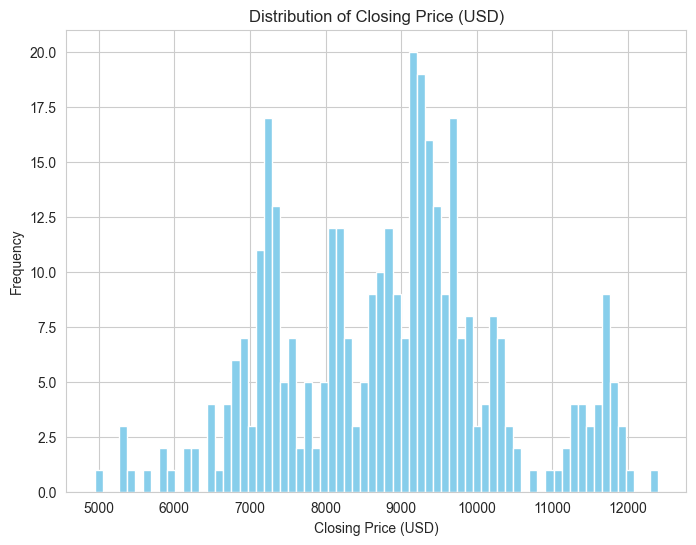

In [69]:
# Plotting the histogram for 'Closing Price (USD)' for Bitcoin
plt.figure(figsize=(8, 6))
plt.hist(btc_data['Closing Price (USD)'], bins=70, color='skyblue')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Price (USD)')
plt.grid(True)
plt.show()

### Analysis for Section 2:

*<br>Some descriptive statistics that I was interested in were the shape, size, and other exploratory variables such as the mode, median, range, skewness, and kurtosis. Although the first two code cells contain data on all columns and all cryptocurrencies in the DataFrame, I decided to focus on the closing price (USD) of only BitCoin within the most recent year of data entry. Since Bitcoin is referred to as BTC in the original DataFrame df, as well as generally in the stock market, I will refer to Bitcoin as BTC as such, in the remaining analyses below.</br>* 

*<br> I calculated that the median is 8970.670572 USD, with the mode being 4944.702336 USD, and a range of 7454.409549 USD.</br>*

*<br>From the "Additional Descriptive Statistics" data, I noticed that the skewness level was around 0.078, with a kurtosis value of around -0.256. From the skewness level, I could tell that the distribution is barely positively skewed, meaning that the tail on the right side is a little bit longer than the left side, but overall is very close to resembling a normal distribution. Kurtosis essentially measures how much a probability's distributions's tails differ from a normal distribution. Regarding the small negative kurtosis value that I calculated, I could tell that there is a slightly lighter tail with less extreme values and possible outliers.</br>*

<hr style="color: #DD3403;">

# Section 3

*Exploratory Data Visualization: In Python, create at least one data visualization. This does not need to be complex, but should showcase something about your EDA or Data Science analysis. In Markdown, provide at least a two sentence summary of this result.*

*Reference Labs: lab_plots, lab_gpa*

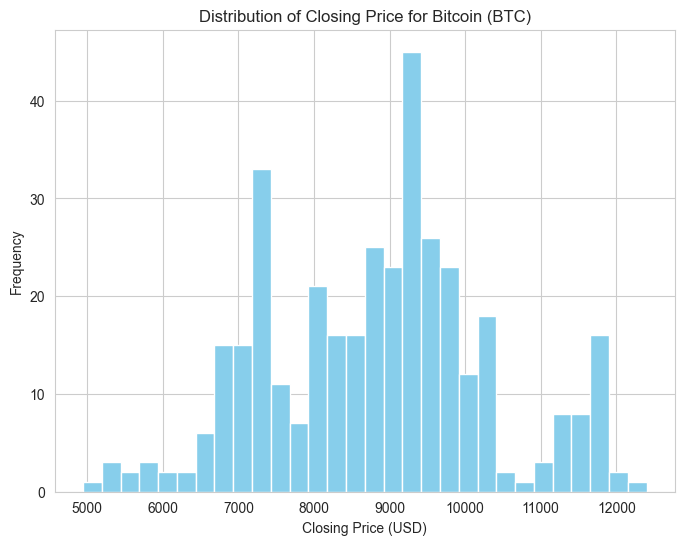

In [70]:
# Plotting the histogram for 'Closing Price (USD)' for Bitcoin
plt.figure(figsize=(8, 6))
plt.hist(btc_data['Closing Price (USD)'], bins=30, color='skyblue')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Price for Bitcoin (BTC)')
plt.grid(True)
plt.show()

In [71]:
btc_data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),24h Change
2158,BTC,2019-09-08,10495.227364,10333.999063,10563.710890,10288.753164,10316.582129
2159,BTC,2019-09-09,10402.796531,10485.409724,10595.195564,10244.582576,10402.735366
2160,BTC,2019-09-10,10332.942188,10402.767948,10524.386954,10097.980385,-69.854343
2161,BTC,2019-09-11,10082.946826,10332.937274,10380.306588,9956.122723,9900.675056
2162,BTC,2019-09-12,10152.752984,10107.495038,10269.030392,9891.803301,9974.409318
...,...,...,...,...,...,...,...
2519,BTC,2020-09-04,10712.920646,11409.726335,11470.807021,10505.146810,10712.496563
2520,BTC,2020-09-05,10563.896939,10177.721642,10644.241174,10118.718611,10563.815011
2521,BTC,2020-09-06,10042.854854,10470.026686,10574.307306,9894.225400,10042.621354
2522,BTC,2020-09-07,10207.605003,10174.863432,10355.652495,10014.277661,10207.262762


### Part 1 of Section 3 Analysis:
*<br>In this section, I decided to focus the data visualization on BTC. I felt that the closing price (USD) was the most interesting out of all the data that was provided in the original excel file and DataFrame, out of all the different data columns. I decided to focus on the most recent 365 days of data (September 8, 2019 to September 8, 2020). After looking at the plot I created using matplotlib, I discovered that the lowest closing price was around 5000 USD, while the highest closing price was around 12000 USD. Furthermore, the most frequently occurring closing price was around 9000 USD.</br>*

In [72]:
sorted_btc_data = btc_data.sort_values("24h Change", ascending=True)

# Display the sorted DataFrame
print(sorted_btc_data)

     Currency       Date  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
2232      BTC 2019-11-22          7612.740574     8074.840561     8118.113996   
2318      BTC 2020-02-16          9926.353691    10367.527479    10397.536480   
2313      BTC 2020-02-11          9838.900016    10132.706479    10197.199283   
2172      BTC 2019-09-22          9984.520516    10138.357558    10179.742475   
2316      BTC 2020-02-14         10218.099737    10364.232380    10516.917925   
...       ...        ...                  ...             ...             ...   
2495      BTC 2020-08-11         11832.227308    11693.179447    12070.441820   
2501      BTC 2020-08-17         11896.947170    11862.387419    11938.876105   
2517      BTC 2020-09-02         11964.208672    11661.427339    12070.227406   
2503      BTC 2020-08-19         12071.738909    12299.816207    12391.840714   
2502      BTC 2020-08-18         12399.111885    11916.580223    12476.697038   

      24h Low (USD)    24h 

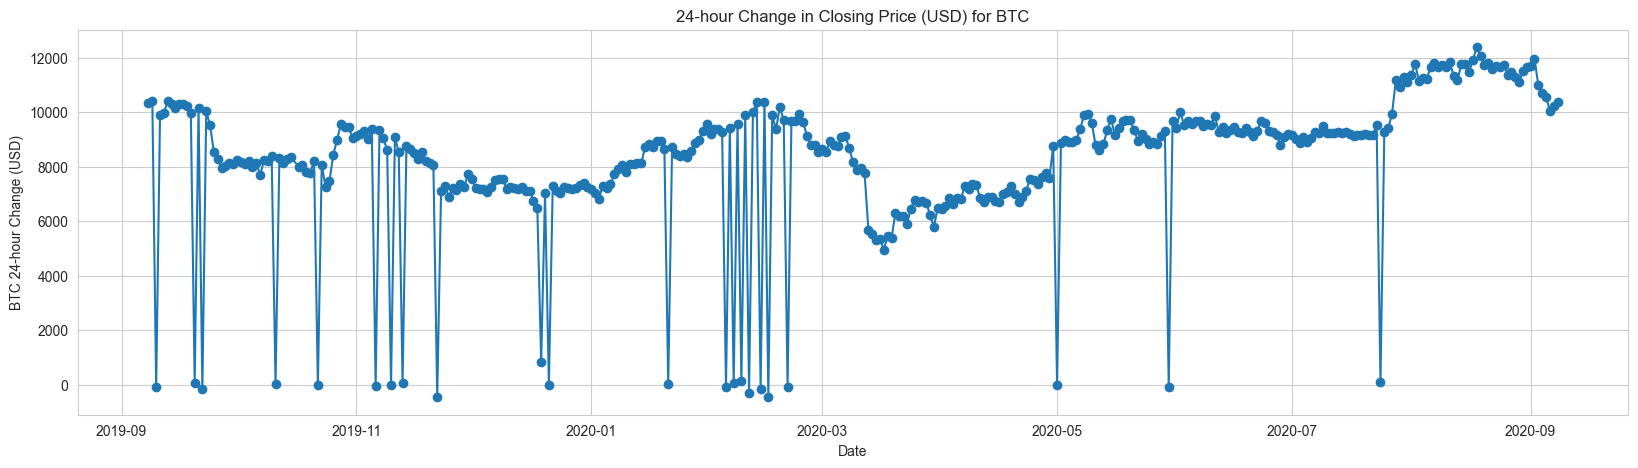

In [73]:
plt.figure(figsize=(20, 5))
plt.plot(btc_data['Date'], btc_data['24h Change'], marker='o', linestyle='-')
plt.title('24-hour Change in Closing Price (USD) for BTC')
plt.xlabel('Date')
plt.ylabel('BTC 24-hour Change (USD)')
plt.grid(True)
plt.show()

### Part 2 of Section 3 Analysis:
*<br>While working on this section, I also got curious regarding the 24h Change in BTC, I became more curious regarding the 24-hour Change in Closing Price for BTC. I calculated the overall 24h Change for the entire DataFrame in Section 2, and created a new column in the DataFrame called "24h Change". The DataFramesorted_btc_data, and 24-hour change graph only contain data from September 8, 2019 to September 8, 2020.</br>*

*<br>Explanation of what 24-hour Change means: For August 18, 2020, the 24-hour change in USD was approximately 12380 USD. This means that between August 17, 2020 and August 18, 2020, the price in BTC had increased by 12380 USD.</br>*

*<br>Looking at the graph and sorted DataFrame above, we can see that the largest positive 24h Change was an increase in 12380 USD, while the largest negative 24h Change was a decrease in 462 USD.</br>*

<hr style="color: #DD3403;">

# Section 4

*Data Science: In Markdown, explain at least one question you have about your dataset. Clearly state the questions you have and how you plan on using Python to answer them. This may involve cleaning or selecting a subset of the data. You can use any technique you learned in DISCOVERY that is beyond simple descriptive statistics. You can use regression, hypothesis testing, correlation, simulation, or ideas from any of the labs, MicroProjects, or lecture. In Python, do the data science! :D*

*Reference Labs: lab_favorites, lab_similarity, lab_justice, lab_probability, lab_random_variable, lab_hypothesis_tests, lab_regression, lab_kmeans*

### 2D Correlation Heatmap

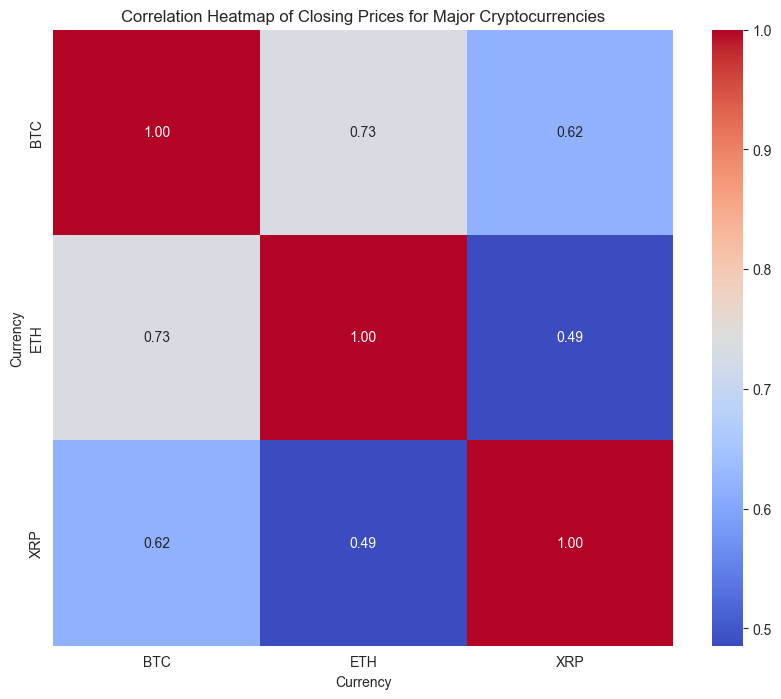

In [74]:
# Select Bitcoin and other major cryptocurrencies (e.g., Ethereum 'ETH', Ripple 'XRP')
selected_currencies = ['BTC', 'ETH', 'XRP']
crypto_data = df[df['Currency'].isin(selected_currencies)]

# Pivot the data for easy correlation calculation
pivot_data = crypto_data.pivot(index='Date', columns='Currency', values='Closing Price (USD)')

# Calculate correlation matrix
correlation_matrix = pivot_data.corr()

# Plotting correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Closing Prices for Major Cryptocurrencies')
plt.show()

### 3D Surface Plot

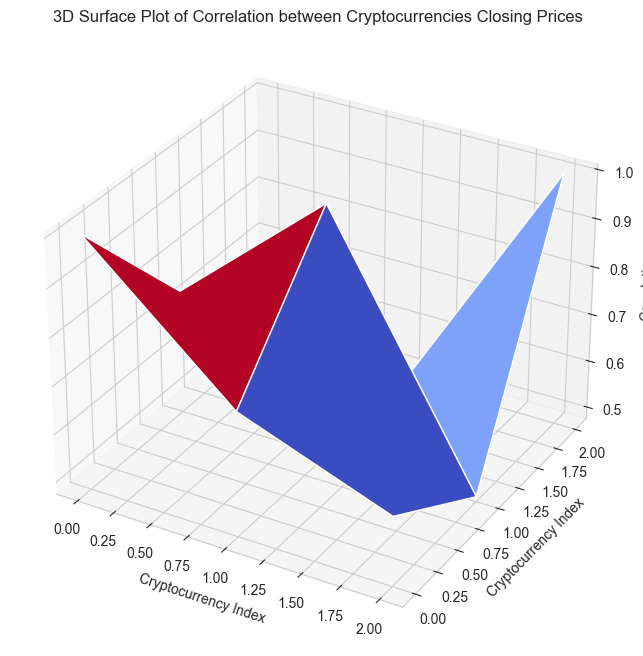

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the dataset
file_path = "C:/Users/ericz/OneDrive/Desktop/stat107/ericrz2/project-2/BitCoinDataset.xlsx"
df = pd.read_excel(file_path)

# Select Bitcoin and other major cryptocurrencies (e.g., Ethereum 'ETH', Ripple 'XRP')
selected_currencies = ['BTC', 'ETH', 'XRP']
crypto_data = df[df['Currency'].isin(selected_currencies)]

# Pivot the data for easy correlation calculation
pivot_data = crypto_data.pivot(index='Date', columns='Currency', values='Closing Price (USD)')

# Calculate correlation matrix
correlation_matrix = pivot_data.corr()

# Create a meshgrid for x, y coordinates
x, y = np.meshgrid(range(correlation_matrix.shape[0]), range(correlation_matrix.shape[1]))

# Flatten correlation matrix to get z values
z = correlation_matrix.values

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D surface
surf = ax.plot_surface(x, y, z, cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Cryptocurrency Index')
ax.set_ylabel('Cryptocurrency Index')
ax.set_zlabel('Correlation')
ax.set_title('3D Surface Plot of Correlation between Cryptocurrencies Closing Prices')

# Show interactive plot
plt.show()


### 3D Surface Plot Heatmap

In [76]:
import pandas as pd
import plotly.graph_objs as go

# Load the dataset select specific currencies
selected_currencies = ['BTC', 'ETH', 'XRP']
crypto_data = df[df['Currency'].isin(selected_currencies)]
pivot_data = crypto_data.pivot(index='Date', columns='Currency', values='Closing Price (USD)')
correlation_matrix = pivot_data.corr()

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=correlation_matrix.values)])

# Update layout with axis labels
fig.update_layout(
    title='3D Surface Plot of Correlation between Cryptocurrencies Closing Prices',
    scene=dict(
        xaxis=dict(title='Cryptocurrency Index'),
        yaxis=dict(title='Cryptocurrency Index'),
        zaxis=dict(title='Correlation')
    )
)

# Show the plot
fig.show()


In [77]:
import pandas as pd
import plotly.graph_objects as go

# Filter data for Bitcoin (BTC), Ripple (XRP), and Ethereum (ETH) for the last 366 days
btc_prices = df[df['Currency'] == 'BTC']['Closing Price (USD)'].tail(200)
xrp_prices = df[df['Currency'] == 'XRP']['Closing Price (USD)'].tail(200)
eth_prices = df[df['Currency'] == 'ETH']['Closing Price (USD)'].tail(200)

# Create a new DataFrame for BTC, XRP, and ETH closing prices
crypto_prices = pd.DataFrame({
    'BTC': btc_prices.values,
    'XRP': xrp_prices.values,
    'ETH': eth_prices.values
})

# Calculate correlation matrix
corr_matrix = crypto_prices.corr()

# Create a meshgrid for 3D plotting
x, y = ['BTC', 'BTC', 'XRP'], ['XRP', 'ETH', 'ETH']

# Create the surface plot
surface = go.Surface(
    x=x,
    y=y,
    z=corr_matrix.values,
    colorscale='Viridis',  # Choose the colorscale
)

# Layout setup for the plot
layout = go.Layout(
    title='Correlation between BTC, XRP, and ETH Closing Prices (Last 100 days)',
    scene=dict(
        xaxis=dict(title='BTC'),
        yaxis=dict(title='XRP, ETH'),
        zaxis=dict(title='Correlation'),
    )
)

# Combine data and layout into a figure
fig = go.Figure(surface, layout)

# Display the interactive 3D plot
fig.show()


### Part 1 of Section 4 Analysis:

*<br>The main question I was wondering is whether there was any correlation between different cryptocurrencies. To be more specific, I wanted to focus on the closing prices of three main cryptocurrencies, which are BTC, ETH, and XRP. I hoped that from making these correlation plots, I could determine if there were similar market trends or influences between the cryptocurrencies, that would affect their price in relation to each other.</br>*

*<br>I planned on utilizing python to create a 2D correlation heatmap, a 3D surface plot, as well as a 3D interactive correlation heatmap.</br>*

*<br>In the code above, I created a correlation matrix between these currencies based on their closing prices, and generated a 3D surface plot heatmap using Plotly to visualize this correlation matrix.*</br>

*The two resulting 3D surface plots displayed the correlation values between the selected cryptocurrencies. Each point on the surface represents the correlation coefficient between two cryptocurrencies at a specific intersection in the matrix. In the normal 3D plot, cooler colors, such as blue, indicate lower correlation between the three cryptocurrencies, while warmer colors such as red, indicate higher correlation between the three cryptocurrencies. For the 3D correlation heatmaps, the "brighter" the color, the greater the correlation, and vice versa. (There are also bars within the plot itself that indicate the correlation and the colors associated). The two heatmaps are almost similar, the only difference is that the second heatmap only contains the 200 most recent days of data.*

*The correlation coefficient measures the strength and direction of the relationship between two variables. In this case, it indicates how closely the closing prices of these cryptocurrencies move together. The values will range from -1 to 1:*

*<br>• 1 indicates a perfect positive correlation (when one cryptocurrency goes up, the other tends to go up).</br>*
*<br>• -1 indicates a perfect negative correlation (when one cryptocurrency goes up, the other tends to go down).</br>*
*<br>• 0 indicates no correlation (the movement of one cryptocurrency doesn’t predict the movement of the other).</br>*
*<br>Using the 3D surface plot and 3D correlation heatmap, I was able to visually represents these correlation values across my selected cryptocurrencies. In total, higher points on the surface indicate stronger positive correlations, while lower points indicate weaker or negative correlations between the cryptocurrencies.</br>*

### Monte-Carlo Simulation

<Axes: >

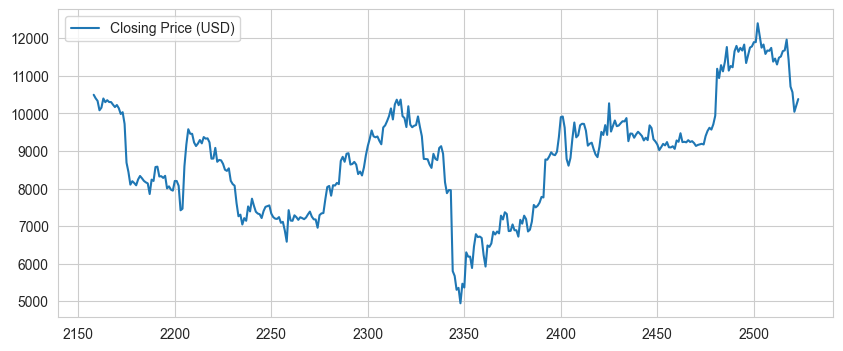

In [78]:
# Plotting Adjusted Closing price for BTC
btc_data['Closing Price (USD)'].plot(legend=True,figsize=(10,4))

In [79]:
# Monte Carlo simulation function
def monte_carlo_simulation(closing_prices, num_simulations, days):
    returns = np.log(closing_prices / closing_prices.shift(1))
    mean_returns = returns.mean()
    std_dev = returns.std()
    
    simulations = np.zeros((days, num_simulations))
    
    for sim in range(num_simulations):
        initial_price = closing_prices.iloc[-1]
        
        for day in range(days):
            drift = mean_returns
            shock = std_dev * np.random.normal()
            price = initial_price * (1 + drift + shock)
            simulations[day, sim] = price
            initial_price = price
    
    return simulations

# Selecting closing prices for simulation
closing_prices = btc_data['Closing Price (USD)']

# Number of simulations and days for forecast
num_simulations = 1000
forecast_days = 60

# Running Monte Carlo simulation
simulated_prices = monte_carlo_simulation(closing_prices, num_simulations, forecast_days)

# Printing simulated prices for the next 'forecast_days' days for the first simulation
print("Simulated prices for the next", forecast_days, "days:")
for day in range(forecast_days):
    print("Day", day+1, ":", simulated_prices[day, 0])


Simulated prices for the next 60 days:
Day 1 : 10214.864760038381
Day 2 : 10158.509125489674
Day 3 : 10288.795063205318
Day 4 : 10375.740433212004
Day 5 : 9721.033447327554
Day 6 : 9253.735879362808
Day 7 : 9773.589313890181
Day 8 : 10634.51127100376
Day 9 : 11125.070338336905
Day 10 : 11212.805224743655
Day 11 : 11662.017709674881
Day 12 : 11170.04234126724
Day 13 : 11565.495061316136
Day 14 : 11451.978972507746
Day 15 : 11308.138626700407
Day 16 : 10893.067197047334
Day 17 : 11417.679938436559
Day 18 : 11439.201124035899
Day 19 : 11860.757287245391
Day 20 : 12428.281428830325
Day 21 : 12899.735178677076
Day 22 : 12593.64955012745
Day 23 : 12958.344453278572
Day 24 : 13399.829595567575
Day 25 : 13576.344187149196
Day 26 : 14186.88198616122
Day 27 : 14430.069438133867
Day 28 : 14590.481991733119
Day 29 : 14636.322174870775
Day 30 : 14435.992552548758
Day 31 : 15473.453662380683
Day 32 : 16405.788226710745
Day 33 : 16879.604895148736
Day 34 : 16255.79483227717
Day 35 : 15770.50149912701

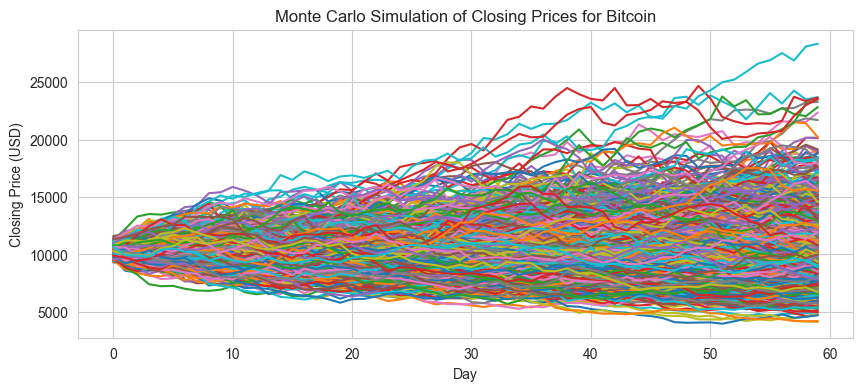

In [80]:
import matplotlib.pyplot as plt

# Plotting the Monte Carlo simulation
plt.figure(figsize=(10, 4))

for sim in range(num_simulations):
    plt.plot(simulated_prices[:, sim])

plt.title('Monte Carlo Simulation of Closing Prices for Bitcoin')
plt.xlabel('Day')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


In [81]:
import pandas as pd

# Sorted the DataFrame by Date
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data = btc_data.sort_values('Date')

# Calculate daily returns
btc_data['Daily Return'] = btc_data['Closing Price (USD)'].pct_change() * 100

# Print the DataFrame with daily returns
print(btc_data[['Date', 'Closing Price (USD)', 'Daily Return']])

           Date  Closing Price (USD)  Daily Return
2158 2019-09-08         10495.227364           NaN
2159 2019-09-09         10402.796531     -0.880694
2160 2019-09-10         10332.942188     -0.671496
2161 2019-09-11         10082.946826     -2.419402
2162 2019-09-12         10152.752984      0.692319
...         ...                  ...           ...
2519 2020-09-04         10712.920646     -6.254818
2520 2020-09-05         10563.896939     -1.391065
2521 2020-09-06         10042.854854     -4.932290
2522 2020-09-07         10207.605003      1.640471
2523 2020-09-08         10381.776107      1.706288

[366 rows x 3 columns]


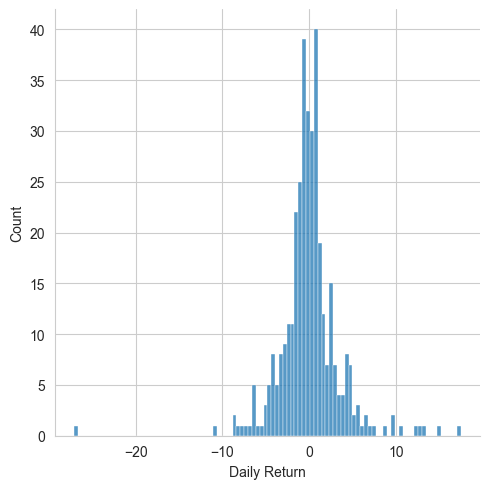

In [82]:
# Visualizing the Value at Risk

sns.displot(btc_data['Daily Return'].dropna(),bins=100)

0.06211573235042683 3.58190314933171


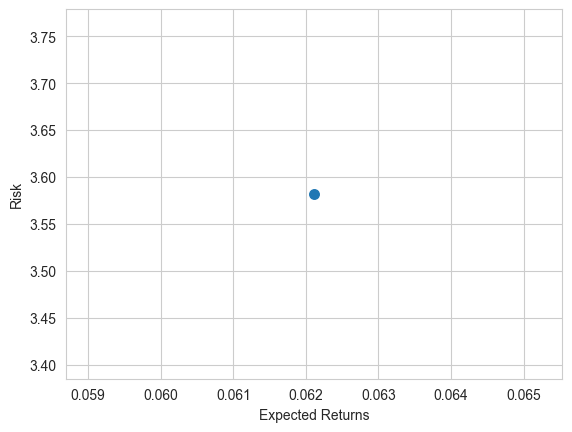

In [83]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = btc_data['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

#rets.mean() gives us the expected return, and rets.std() gives us the expected risk of return
print(rets.mean(), rets.std())

### Part 2 of Section 4 Analysis:

*<br>Another question I had when working on this project was: What are the potential risks and returns of BTC?</br>*
*<br>To answer this, I decided to create a Monte-Carlo simulation of expected closing prices of BTC after 60 days (2 months) of investment, using data in the DataFrame btc_data from September 8, 2019 to September 8, 2020. The Monte-Carlo simulation plots 1000 simulated price trends for BTC for the approximatley 2 months, using data provided from the DataFrame btc_data. From there, it will be easier to see what the expected and potential closing prices of BTC will be after 2 months of investment. I noticed that the majority of simulations displayed simulated closing price between 5000 and 20000 USD, with one most notable outlier having a closing price of over 25000 USD.</br>*

*<br>The 'Daily Return' column displays  the percentage change in BTC's closing price from one day to the next. For example, the Daily Return on September 9, 2019 was -0.880694, meaning that the price in BTC dropped by approximately 0.88%. I also created a bar graph using sns.displot() in order to better visualize the data. I noticed that most of the daily returns were located around 0%, meaning there was high likelihood that there would be close to no change in BTC's closing price between two consecutive days. However, I noticed some outliers, such as daily returns of over 10% and one daily return of over -20%.</br>*

*<br>I also implemented Risk Analysis, where I compared expected returns vs. the expected risk. I found that the expected return is approximately 0.062, while the expected risk of return is approximately 3.58. Expected return is an estimate of the average return that an investment into a cryptocurrency or portfolio investmant should generate over a given period of time. Higher expected return usually mean there are riskier assets involved, where the higher expected return is needed to compensate for the additional risk. The expected risk of return is the standard deviation of the data in the 'Daily Returns' column, which measures how much an asset's return varies from the average return (in this case, the average daily return), over a given period of time. Higher expected risks of return usually correpsond to assets with larger "price swings" and more volatile investments. </br>*

<hr style="color: #DD3403;">

# Section 5

*Overall Summary: In Markdown, summarize your dataset, findings, and visualization. A good summary shares a complete overview of your work in only 1-2 paragraphs without going low-level into the code. This might be the summary you would share in a future interview if someone asked you about "what is a data science project you did on your own?". Make sure to include at least 1-2 paragraphs for your summary (a paragraph is at least 5 sentences).*

### Summary: 

*<br>In this project, I explored a dataset encompassing cryptocurrency closing prices, focusing on major currencies like Bitcoin (BTC), Ethereum (ETH), and Ripple (XRP). The dataset, sourced from a specific time range, provided a comprehensive look at how these currencies correlated over time. The initial steps involved data preprocessing, including cleaning, organizing, and computing the correlation matrix to unveil relationships among these cryptocurrencies. Exploratory Data Analysis (EDA) revealed significant trends, such as BTC having a strong positive correlation with Ethereum and Ripple. However, graphs and plots were able to show much more, compared to what the EDA analysis had to offer. For example, utilizing visual representations of BTC's price movements displayed the cryptocurrency's volatility and fluctuations, where high-frequency changes, sudden spikes, or prolonged periods of stability are better understood visually than by summary statistics alone. Furthermore, 2D and 3D correlation plots reveal more detailed and complex relationships between multiple cryptocurrencies that go beyond single-variable statistics like correlation coefficients. By visualizing correlations, we may uncover nonlinear or other interactions that the additional descriptive statistics may not fully capture.</br>*

*<br>The visualization aspect of the project was crucial in illustrating these correlations. Utilizing Plotly, I created an interactive 3D surface plot showcasing the correlation matrix. Each axis represented one of the major cryptocurrencies, and the surface plot's heights reflected the strength of correlations between them. For example, peaks or elevated areas on the surface indicated strong positive correlations between the corresponding cryptocurrencies. A high surface point between two cryptocurrencies implies that their prices tend to move in tandem, exhibiting a positive relationship. Flat or lower areas on the surface suggest weaker or negligible correlations between cryptocurrencies. When surface heights are closer to the "baseline", it indicates that the price movements of those specific cryptocurrencies are relatively independent of each other. This lack of correlation suggests that changes in one cryptocurrency's value have minimal impact on the others.</br>*

*<br>To dive deeper into the topic of cryptocurrency and specific terminology related to it, I created a Monte-Carlo simulation which utilized 1000 simulations to predict the closing price of BTC after 60 days (2 months) of investment. Using this graph, as well as data on the expected return on investment (ROI) and the corresponding expected risk of ROI, I was able to see much more than what I initially looked into when creating my EDA. Taking the focus off more general statistical variables such as mode, median, skewness, etc., I was able to divert my attention to crypto-focused variables, which included expected ROI and expected risk of ROI, which are very crucial in the world of finance and investment. These two variables can inform investors whether or not their possible investment in a cryptocurrency (in this case, BTC) is more volatile and risky compared to similar funds and investments.</br>*

<hr style="color: #DD3403;">